In [6]:
# Import python libs
import pandas as pd
import matplotlib.pyplot  as plt

In [2]:
# read csv with pandas
df = pd.read_csv('data\\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###### Principal estratégia: Comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos.
###### Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita. Entretanto, as casas possuem muitos 
###### atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

In [3]:
# Primeiramente, comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos.
# Parametrizar as localizações pela mediana do valor, assumindo assim as áreas nobres/mais valorizadas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Assim, vou usar a coluna zip-code, assumindo que ela seja responsável pela localização, então vou agrupar elas e verificar a media de preço
df_location_price = pd.DataFrame()
df_location_price['average_prices_by_zipcode_ordered'] = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

df_location_price['median_prices_by_zipcode_ordered'] = df.groupby('zipcode')['price'].median().sort_values(ascending=False)
df_location_price.head()

# print("number of locations in the dataset -> ",len(df_location_price)) 


,average_prices_by_zipcode_ordered,median_prices_by_zipcode_ordered
zipcode,,
98039,2.160607e+06,1892500.0
98004,1.355927e+06,1150000.0
98040,1.194230e+06,993750.0
98112,1.095499e+06,915000.0
98102,9.012583e+05,720000.0


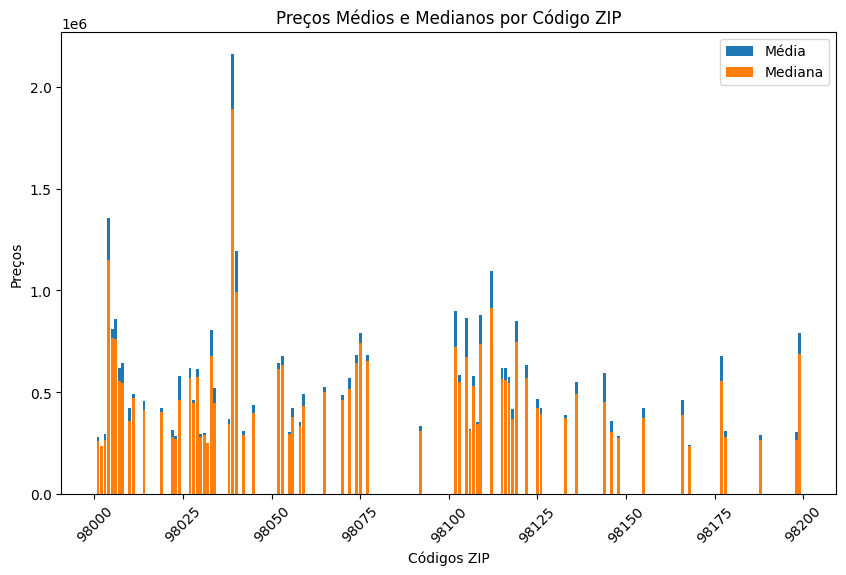

In [8]:
# Resetar o índice para que 'zipcode' seja uma coluna novamente
df_location_price.reset_index(inplace=True)

# Criar um gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Adicionar barras para a média
ax.bar(df_location_price['zipcode'], df_location_price['average_prices_by_zipcode_ordered'], label='Média')

# Adicionar barras para a mediana
ax.bar(df_location_price['zipcode'], df_location_price['median_prices_by_zipcode_ordered'], label='Mediana')

# Adicionar rótulos e título
ax.set_xlabel('Códigos ZIP')
ax.set_ylabel('Preços')
ax.set_title('Preços Médios e Medianos por Código ZIP')
ax.legend()

# Rotacionar os rótulos no eixo x para melhor visualização
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()